In [1]:
# 整理数据的库
import numpy as np
import pandas as pd
# 数据可视化的库
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
sns.set(font='SimHei')  # 解决Seaborn中文显示问题
# 数据分析的库
from scipy import stats
import scipy.stats as stats
import statsmodels.formula.api as smf # 回归分析
from scipy.stats import chi2_contingency #卡方检验
import pingouin as pg
# 其它
import warnings
warnings.filterwarnings('ignore') #忽视警告


In [2]:
# 读取数据
df = pd.read_excel("D:\\work\github\\survey_and_stats\\esl-survey\\esl.xlsx")

# 数据清洗

In [3]:
# 定义函数方法:将数字和数字和代表含义一一映射

# usage：1为"是"，其余为"否"
def usage(series):
    if series == 1:
        return '是'
    else:
        return '否'

# select：1为"选中"，其余为"未选中"
def select(series):
    if series == 1:
        return '选中'
    else:
        return '未选中'

# cet：1为"通过了"，2为"未通过"
def cet(series):
    if series == 1:
        return '通过了'
    else:
        return '未通过'

# gender变量：1为男性，2为女性
def gender(series):
    if series == 1:
        return '男性'
    else:
        return '女性'
# hukou变量：1为城镇，2为非城镇
def hukou(series):
    if series == 1:
        return '城镇类'
    else:
        return '非城镇类'
# grade变量：1-4为大一~大四
def grade (series):
    if series == 1:
        return "大一"
    elif series == 2:
        return "大二"
    elif series == 3:
        return "大三"
    else:
        return "大四"
# like变量：1为喜欢，0为不喜欢
def major_type(series):
    if series == 1:
        return '人文社科类'
    else:
        return '理工医类'
# school变量：1=商学院,2=电子与计算机工程学院,3=文学与传媒学院,4=护理与健康学院,5=艺术设计与创意产业系,6=会计学院,7=外国语学院,8=云康医学与健康学院,9=公共管理学院,10=音乐系，
def school (series):
    if series == 1:
        return "商学院"
    elif series == 2:
        return "电子与计算机工程学院"
    elif series == 3:
        return "文学与传媒学院"
    elif series == 4:
        return "护理与健康学院"
    elif series == 5:
        return "艺术设计与创意产业系"
    elif series == 6:
        return "会计学院"
    elif series == 7:
        return "外国语学院"
    elif series == 8:
        return "云康医学与健康学院"
    elif series == 9:
        return "公共管理学院"
    else:
        return "音乐系"
# major变量：1=英语系,2=日语系,3=法语系,4=汉语国际教育系
def major (series):
    if series == 1:
        return "英语系"
    elif series == 2:
        return "日语系"
    elif series == 3:
        return "法语系"
    else:
        return "汉语国际教育系"



In [4]:
# 将Q1，Q3,Q4,Q12 ~ Q17 变量转为“类别型变量”
df.usage = df.usage.apply(usage).astype('category')
df.cet4 = df.cet4.apply(cet).astype('category')
df.cet6 = df.cet6.apply(cet).astype('category')
df.gender = df.gender.apply(gender).astype('category')
df.hukou = df.hukou.apply(hukou).astype('category')
df.grade = df.grade.apply(grade).astype('category')
df.major_type = df.major_type.apply(major_type).astype('category')
df.grade = df.grade.apply(grade).astype('category')
df.school = df.school.apply(school).astype('category')
df.major = df.major.apply(major).astype('category')

In [5]:
# 看一下每一个变量对应的是第几个变量（变量名前的数字为其顺序）
for i in range(len(df.columns)):
    print(i,df.columns[i])

0 usage
1 platform_bilibili
2 platform_icourse
3 platform_tencent
4 platform_other
5 cet4
6 cet6
7 gaokao
8 digital_skill
9 study_grammar
10 study_vocabulary
11 study_listening
12 study_speaking
13 study_writing
14 study_translation
15 study_reading
16 behav_1
17 behav_2
18 behav_3
19 behav_4
20 behav_5
21 behav_6
22 cogn_1
23 cogn_2
24 cogn_3
25 cogn_4
26 cogn_5
27 cogn_6
28 emo_1
29 emo_2
30 emo_3
31 emo_4
32 soc_1
33 soc_2
34 soc_3
35 gender
36 hukou
37 grade
38 major_type
39 school
40 major


In [6]:
# 将以“platform_”开头的变量（第1~9列的变量）转为“类别型变量”
for i in range(1,5):
    df.iloc[:,i] = df.iloc[:,i].apply(select).astype('category')

In [7]:
# 检查一下结果
df.filter(regex = "^platform_.*").head(5)

,platform_bilibili,platform_icourse,platform_tencent,platform_other
0,未选中,未选中,未选中,未选中
1,选中,选中,选中,未选中
2,未选中,未选中,未选中,未选中
3,未选中,未选中,未选中,未选中
4,未选中,未选中,未选中,未选中


# 拆分子样本

In [8]:
df_subsample = df[df.usage == "是"]

In [9]:
#检查一下结果
df_subsample.head(5)

,usage,platform_bilibili,platform_icourse,platform_tencent,platform_other,cet4,cet6,gaokao,digital_skill,study_grammar,...,emo_4,soc_1,soc_2,soc_3,gender,hukou,grade,major_type,school,major
1,是,选中,选中,选中,未选中,未通过,未通过,4,4,2,...,4,4,5,4,男性,城镇类,大四,人文社科类,文学与传媒学院,汉语国际教育系
5,是,选中,未选中,未选中,未选中,通过了,未通过,4,4,1,...,6,6,6,6,女性,城镇类,大四,人文社科类,文学与传媒学院,汉语国际教育系
8,是,未选中,未选中,未选中,选中,未通过,未通过,3,4,1,...,5,2,2,2,女性,城镇类,大四,人文社科类,文学与传媒学院,汉语国际教育系
9,是,选中,选中,未选中,未选中,未通过,未通过,2,4,3,...,3,2,3,3,女性,非城镇类,大四,人文社科类,文学与传媒学院,汉语国际教育系
12,是,选中,未选中,未选中,未选中,通过了,通过了,3,5,1,...,4,3,3,3,女性,非城镇类,大四,理工医类,文学与传媒学院,汉语国际教育系


# 数据计算

In [10]:
#计算behav,cogn,emo,soc这四个变量

In [11]:
df_subsample["behav"]=(df_subsample.behav_1+df_subsample.behav_2+df_subsample.behav_3+df_subsample.behav_4+df_subsample.behav_5+df_subsample.behav_6)/6
df_subsample["cogn"]=(df_subsample.cogn_1+df_subsample.cogn_2+df_subsample.cogn_3+df_subsample.cogn_4+df_subsample.cogn_5+df_subsample.cogn_6)/6
df_subsample["emo"]=(df_subsample.emo_1+df_subsample.emo_2+df_subsample.emo_3+df_subsample.emo_4)/4
df_subsample["soc"]=(df_subsample.soc_1+df_subsample.soc_2+df_subsample.soc_3)/3

In [12]:
#检查一下数据
df_subsample.head(5)

,usage,platform_bilibili,platform_icourse,platform_tencent,platform_other,cet4,cet6,gaokao,digital_skill,study_grammar,...,gender,hukou,grade,major_type,school,major,behav,cogn,emo,soc
1,是,选中,选中,选中,未选中,未通过,未通过,4,4,2,...,男性,城镇类,大四,人文社科类,文学与传媒学院,汉语国际教育系,3.333333,4.000000,4.75,4.333333
5,是,选中,未选中,未选中,未选中,通过了,未通过,4,4,1,...,女性,城镇类,大四,人文社科类,文学与传媒学院,汉语国际教育系,4.000000,6.000000,6.00,6.000000
8,是,未选中,未选中,未选中,选中,未通过,未通过,3,4,1,...,女性,城镇类,大四,人文社科类,文学与传媒学院,汉语国际教育系,2.500000,2.000000,2.75,2.000000
9,是,选中,选中,未选中,未选中,未通过,未通过,2,4,3,...,女性,非城镇类,大四,人文社科类,文学与传媒学院,汉语国际教育系,3.833333,4.333333,4.25,2.666667
12,是,选中,未选中,未选中,未选中,通过了,通过了,3,5,1,...,女性,非城镇类,大四,理工医类,文学与传媒学院,汉语国际教育系,3.166667,3.000000,4.00,3.000000


In [38]:
df["school"]

0        文学与传媒学院
1        文学与传媒学院
2        文学与传媒学院
3        文学与传媒学院
4        文学与传媒学院
5        文学与传媒学院
6        文学与传媒学院
7        文学与传媒学院
8        文学与传媒学院
9        文学与传媒学院
10       文学与传媒学院
11       文学与传媒学院
12       文学与传媒学院
13       文学与传媒学院
14       文学与传媒学院
15       文学与传媒学院
16       文学与传媒学院
17       文学与传媒学院
18       文学与传媒学院
19       文学与传媒学院
20       文学与传媒学院
21       文学与传媒学院
22       文学与传媒学院
23       文学与传媒学院
24       文学与传媒学院
25    电子与计算机工程学院
26       文学与传媒学院
27       文学与传媒学院
28       文学与传媒学院
29       文学与传媒学院
30    电子与计算机工程学院
31       文学与传媒学院
32    电子与计算机工程学院
33           商学院
34          会计学院
35        公共管理学院
36           商学院
37           商学院
38          会计学院
39           音乐系
40       文学与传媒学院
41        公共管理学院
42          会计学院
43          会计学院
44        公共管理学院
45        公共管理学院
46    艺术设计与创意产业系
47           商学院
48           商学院
49           商学院
50           商学院
51           商学院
52           商学院
53    电子与计算机工程学院
54           商学院
55          会计学院
56     云康医学与健康学院
Name: school, dtype: category
C

# 数据分析

## ✨探索数据（描述性统计）

In [13]:
# 返回所有变量的描述性统计结果（注意——这里的描述性统计结果仅适用于“数值型变量”）
df_subsample.describe()

,gaokao,digital_skill,study_grammar,study_vocabulary,study_listening,study_speaking,study_writing,study_translation,study_reading,behav_1,...,emo_2,emo_3,emo_4,soc_1,soc_2,soc_3,behav,cogn,emo,soc
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,...,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,2.827586,3.896552,1.896552,2.862069,2.344828,1.931034,2.034483,2.206897,2.482759,3.413793,...,3.758621,3.758621,4.034483,3.517241,3.241379,3.482759,3.298851,3.793103,3.896552,3.413793
std,1.071346,0.859602,0.816999,0.953345,0.813979,0.842235,0.778403,0.861034,0.911070,1.401969,...,1.272095,1.122980,1.017095,1.326130,1.405478,1.271127,1.054449,1.074280,0.978604,1.268217
min,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,3.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,4.000000,3.000000,2.000000,3.000000,2.500000,3.333333,3.500000,2.333333
50%,3.000000,4.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,3.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.500000,4.000000,4.000000,3.333333
75%,4.000000,4.000000,2.000000,4.000000,3.000000,2.000000,3.000000,3.000000,3.000000,4.000000,...,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.333333,4.250000,4.333333
max,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,5.000000,6.000000,6.000000,6.000000


In [14]:
# 返回单个变量的描述性统计结果
df_subsample["behav"].describe()


count    29.000000
mean      3.298851
std       1.054449
min       1.000000
25%       2.500000
50%       3.500000
75%       4.000000
max       5.000000
Name: behav, dtype: float64

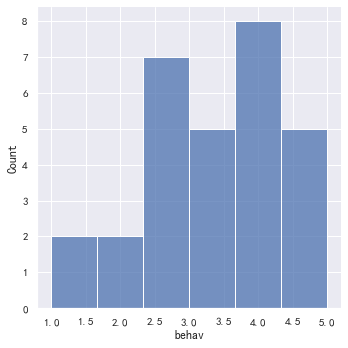

In [15]:
# 直方图
sns.displot(data=df_subsample, x = "behav")

In [16]:
# 类别型变量的描述性统计结果
df.gender.value_counts()

女性    47
男性    10
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

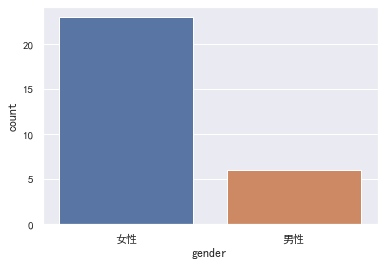

In [17]:
# 条形图
sns.countplot(x="gender", data=df_subsample)

In [18]:
# 饼状图
table_school = df_subsample.school.value_counts()#将学院变量整理成表格
table_school


文学与传媒学院       17
商学院            5
公共管理学院         3
云康医学与健康学院      1
会计学院           1
电子与计算机工程学院     1
艺术设计与创意产业系     1
音乐系            0
Name: school, dtype: int64

<AxesSubplot:ylabel='school'>

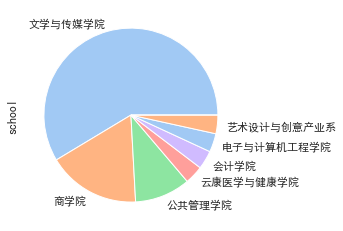

In [19]:
colors = sns.color_palette('pastel')[0:5] #使用seaborn的调色板

table_school.plot.pie(colors = colors)#用matplotlib画图

## 🎉推断性统计

### 1、独立样本t检验

性别（gender） & 行为投入(behav)

In [20]:
# 男女生行为投入的平均值
df_subsample.groupby('gender').behav.mean()

gender
女性    3.405797
男性    2.888889
Name: behav, dtype: float64

In [67]:
# 独立样本t检验结果（检验统计量t值，p值）
stats.ttest_ind(df_subsample['behav'][df_subsample['gender'] == "男性"],
               df_subsample['behav'][df_subsample['gender'] == "女性"])   

Ttest_indResult(statistic=-1.0722246921722047, pvalue=0.2931097853713329)

<AxesSubplot:xlabel='gender', ylabel='behav'>

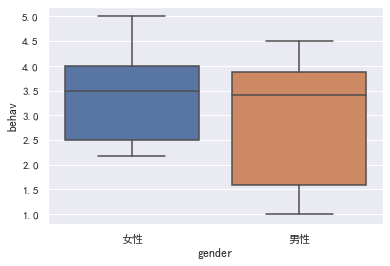

In [22]:
## 独立样本t检验结果可视化
sns.boxplot(x = df_subsample["gender"], y = df_subsample["behav"]) 

**结果解读：**
男生和女生行为投入分别是3.41和2.89.独立样本t检验显示男生和女生行为投入**没有显著差异**(t=2.41,p=0.29 > 0.05)。

### 2、单因素方差分析

学院（school） & 行为投入（behav）

In [23]:
df_subsample.groupby('school').behav.mean()

school
云康医学与健康学院     4.500000
会计学院          3.500000
公共管理学院        3.333333
商学院           3.700000
文学与传媒学院       3.186275
电子与计算机工程学院    1.000000
艺术设计与创意产业系    4.000000
音乐系                NaN
Name: behav, dtype: float64

In [59]:
# 单因素方差分析
aov = pg.anova(data=df_subsample, dv='behav', between='school', detailed=True)
print(aov)


   Source         SS  DF        MS        F     p-unc       np2
0  school   8.283164   6  1.380527  1.32923  0.286206  0.266064
1  Within  22.849020  22  1.038592      NaN       NaN       NaN


In [71]:
#事后检验



posthoc = pg.pairwise_ttests(data=df_subsample, dv='behav', between='school')
pg.print_table(posthoc, floatfmt='.3f')

AssertionError: The T-value must be a int or a float.

<AxesSubplot:xlabel='school', ylabel='behav'>

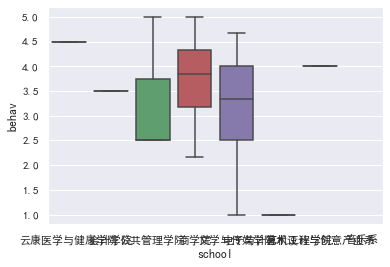

In [41]:
# 单因素方差分析结果可视化
sns.boxplot(x = 'school', y = 'behav', data = df_subsample) 

<AxesSubplot:xlabel='school', ylabel='behav'>

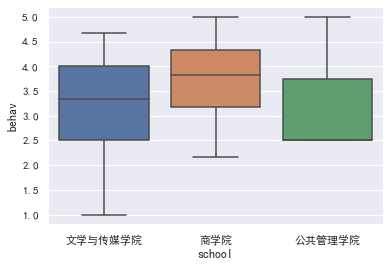

In [57]:
# 筛选"文学与传媒学院","商学院","公共管理学院"这三个学院
sns.boxplot(x = 'school', y = 'behav', data = df_subsample, order= ["文学与传媒学院","商学院","公共管理学院"]) 

**结果解读：**
不同学院的学生在行为投入上**没有显著差异**(F = 1.33, p = 0.29 > 0.05)。

### 3、卡方检验

四级成绩(cet4) & 平台使用（usage）

In [39]:
# 列联表
crosstab = pd.crosstab(df.cet4,df.usage)
crosstab


usage,否,是
cet4,,
未通过,13,12
通过了,15,17


In [40]:
# 卡方检验结果（检验统计量卡方值，p值,自由度，期望频数）
stat, p, dof, expected = chi2_contingency(crosstab) 


In [41]:
#卡方值
stat

0.013710360221674767

In [42]:
# p值
print("p = " + str(p))

p = 0.9067877455744078


<AxesSubplot:xlabel='cet4', ylabel='count'>

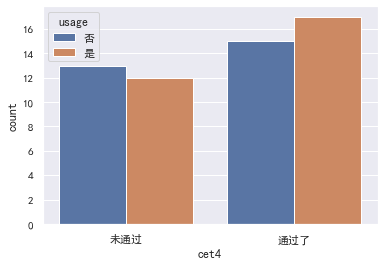

In [43]:
# 卡方检验结果可视化
sns.countplot(x = 'cet4', hue = 'usage', data = df) 

**结果解读：**
卡方检验的结果显示“四级成绩”与“英语学习平台”**没有显著关联**（chisq=0.14,p=0.91 >0.05）。

### 4、相关分析

数字能力（digital_skill） & 行为投入（behav）

In [34]:
# 努力方式与排名的相关关系
pg.pairwise_corr(df_subsample, columns=["digital_skill","behav"], method='pearson')

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,digital_skill,behav,pearson,two-sided,29,0.153532,"[-0.23, 0.49]",0.426522,0.312,0.125557


<AxesSubplot:xlabel='digital_skill', ylabel='behav'>

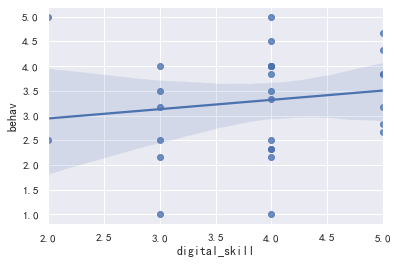

In [35]:
# 散点图（两变量）（包含拟合直线）
sns.regplot(x = "digital_skill", y = "behav", data = df_subsample)

**结果解读：**
相关分析的结果显示“数字能力”与“行为投入”**没有显著相关**（r=0.15,p=0.43 > 0.05）。

In [37]:
# 多个变量的相关分析
df_subsample[[ "behav","cogn","emo","soc"]].rcorr()

,behav,cogn,emo,soc
behav,-,***,***,***
cogn,0.762,-,***,***
emo,0.826,0.883,-,***
soc,0.765,0.792,0.844,-


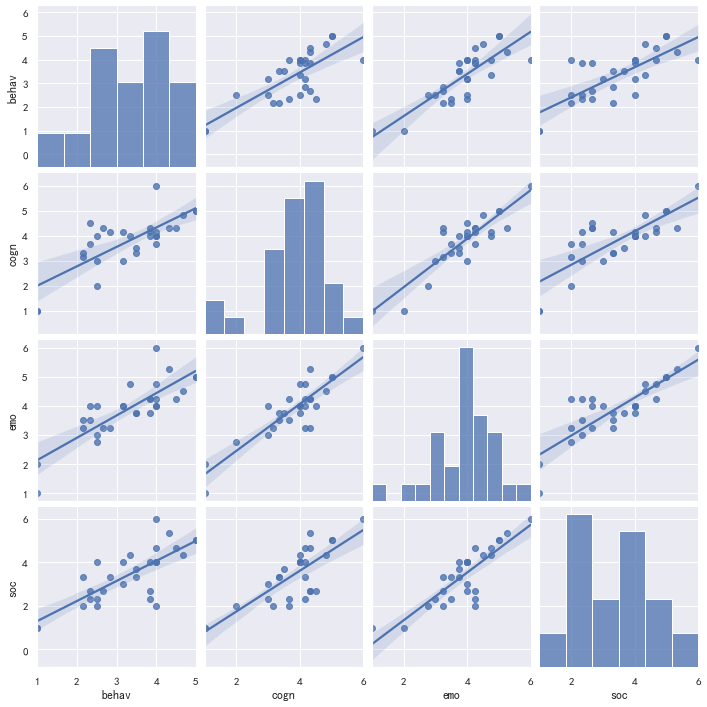

In [38]:
# 筛选多个变量画出散点图（含回归直线）“矩阵”
sns.pairplot(df_subsample[["behav","cogn","emo","soc"]], kind="reg")

**结果解读：**
相关分析的结果显示“行为投入”、“认知投入”、“情感投入”和“社会性投入”两两之间显著相关。

### 6、信度分析

In [60]:
df_subsample_behav = df_subsample.filter(regex = "^behav_.*")#以正则表达式的办法筛选以"behav_"开头的变量
pg.cronbach_alpha(data=df_subsample_behav)[0]

0.8372900129222817

In [57]:
df_subsample_cogn = df_subsample.filter(regex = "^cogn_.*")#以正则表达式的办法筛选以"behav_"开头的变量
pg.cronbach_alpha(data=df_subsample_cogn)[0]

0.9382025136352858

In [58]:
df_subsample_emo = df_subsample.filter(regex = "^emo_.*")#以正则表达式的办法筛选以"behav_"开头的变量
pg.cronbach_alpha(data=df_subsample_emo)[0]

0.8716712211327224

In [59]:
df_subsample_soc = df_subsample.filter(regex = "^soc_.*")#以正则表达式的办法筛选以"behav_"开头的变量
pg.cronbach_alpha(data=df_subsample_soc)[0]

0.9456355283307809

**结果解读：**
“行为投入”、“认知投入”、“情感投入”和“社会性投入”等变量的克隆巴赫系数分别为0.83, 0.94, 0.87, 0.95，说明这几个变量的信度水平较高。